# MOFA Pipeline

- Here is a useful tutorial to get started running MOFApy: https://github.com/bioFAM/mofapy2/blob/master/mofapy2/notebooks/getting_started_python.ipynb

- Here is a useful tutorial to evaluate the MOFApy results using mofax: https://github.com/bioFAM/mofax/blob/master/notebooks/getting_started_pbmc10k.ipynb



In [1]:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import os
import scanpy as sc
import mofax as mfx

from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import decoupler as dc
import plotnine as pn

# initialise the entry point
ent = entry_point()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [2]:
current_path = globals()["_dh"][0]
out_file = current_path / ".." / ".." / "data" / "prc" / "vis" / "mofa_test.hdf5"
visium_path = current_path / ".." / ".." / "data" / "prc" / "vis" / "processed"
visium_samples = [f.split(".")[0] for f in os.listdir(visium_path) if not f.startswith(".")]
print(np.array(visium_samples))

['MS549H' 'CO85' 'MS371' 'MS197U' 'CO41' 'MS377T' 'MS229' 'CO37' 'MS497I'
 'CO40' 'CO96' 'MS371N' 'MS586' 'MS197D' 'MS94' 'CO74' 'MS377N' 'MS549T'
 'MS411' 'MS466' 'MS377I' 'MS497T']


In [3]:
sample_meta = pd.read_excel(current_path / ".." / ".." / "data" / "Metadata_all.xlsx", sheet_name="Visium")
sample_meta

patient_id sample_id Condition lesion_type  Age Sex  RIN  Batch  visium  \
0     MS94 A1D9      MS94        MS          CA   42   F  8.7      1    True   
1    MS197 P2D3    MS197U        MS          CA   52   F  9.0      1    True   
2    MS197 P2D3    MS197D        MS          CA   52   F  9.0      1    True   
3    MS229 P2C2     MS229        MS          CA   53   M  7.0      1    True   
4    MS371 A3D3     MS371        MS           A   40   M  7.9      1    True   
5    MS371 A3D6    MS371N        MS           A   40   M  7.6      3    True   
6    MS377 A2D2    MS377N        MS          CA   50   F  8.9      3    True   
7    MS377 A2D4    MS377I        MS          CA   50   F  6.5      1    True   
8    MS377 A2D4    MS377T        MS          CA   50   F  6.5      1    True   
9    MS411 A2A2     MS411        MS          CA   61   M  5.9      1    True   
10   MS466 A1D6     MS466        MS          CI   65   F  6.5      1    True   
11   MS497 A3C2    MS497I        MS          CI   60   F  6.1      1    True   
12   MS497 A3C2    MS497T        MS          CI   60   F  6.1      1    True   
13   MS549 P2D5    MS549H        MS          CI   50   M  8.0      1    True   
14   MS549 P2D5    MS549T        MS          CI   50   M  8.0      1    True   
15   MS586 A1B2     MS586        MS           A   57   F  7.1      3    True   
16    CO37 P5B3      CO37   Control        Ctrl   87   M  6.1      3    True   
17  PDCO40 A1B2      CO40   Control        Ctrl   61   F  7.8      1    True   
18    CO41 A1C4      CO41   Control        Ctrl   54   M  7.2      3    True   
19    CO74 A1A2      CO74   Control        Ctrl   84   F  7.0      2    True   
20    CO85 A3C2      CO85   Control        Ctrl   81   F  5.9      1    True   
21    CO96 A3C3      CO96   Control        Ctrl   68   F  7.7      1    True   

    snRNA-seq  
0       False  
1        True  
2        True  
3        True  
4       False  
5        True  
6        True  
7        True  
8        True  
9        True  
10       True  
11       True  
12       True  
13       True  
14       True  
15       True  
16       True  
17       True  
18       True  
19       True  
20       True  
21      False

In [4]:
vis_dict = {smp: sc.read_h5ad(visium_path / f"{smp}.h5ad") for smp in visium_samples}

In [5]:
first_sample = visium_samples[0]
print(first_sample)
vis_dict[first_sample]

MS549H


AnnData object with n_obs × n_vars = 3598 × 20205
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'leiden_0.50', 'leiden_0.25', 'leiden_0.10'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'abunds_all', 'abunds_condition', 'abunds_lesion_type', 'hallmark_estimates', 'hallmark_pvals', 'histogram', 'progeny_estimates', 'progeny_pvals', 'props_all', 'props_all_ilr', 'props_condition', 'props_condition_ilr', 'props_lesion_type', 'props_lesion_type_ilr', 'reactome_estimates', 'reactome_pvals', 'spatial', 'summary', 'texture'
    layers: 'counts'

In [6]:
vis_dict[first_sample].obsm_keys()

['abunds_all',
 'abunds_condition',
 'abunds_lesion_type',
 'hallmark_estimates',
 'hallmark_pvals',
 'histogram',
 'progeny_estimates',
 'progeny_pvals',
 'props_all',
 'props_all_ilr',
 'props_condition',
 'props_condition_ilr',
 'props_lesion_type',
 'props_lesion_type_ilr',
 'reactome_estimates',
 'reactome_pvals',
 'spatial',
 'summary',
 'texture']

In [7]:
obsm_to_use = ["abunds_all", "hallmark_estimates"]
#obsm_to_use = ["abunds_all", "hallmark_estimates", "summary"]
#obsm_to_use = ["props_all_ilr", "hallmark_estimates"]
assert np.all(np.isin(obsm_to_use, vis_dict[first_sample].obsm_keys()))

In [8]:
vis_dict[first_sample].obsm["props_all_ilr"].shape[1]

12

In [9]:
["irl_" + str(s) for s in list(range(vis_dict[first_sample].obsm["props_all_ilr"].shape[1]))]

['irl_0',
 'irl_1',
 'irl_2',
 'irl_3',
 'irl_4',
 'irl_5',
 'irl_6',
 'irl_7',
 'irl_8',
 'irl_9',
 'irl_10',
 'irl_11']

In [10]:
# TODO: temporary fix to put the ilr transformed data into a dataframe
for values in vis_dict.values():
    values.obsm["props_all_ilr"] = pd.DataFrame(values.obsm["props_all_ilr"], index=values.obs.index, 
                                                columns=["irl_" + str(s) for s in list(range(values.obsm["props_all_ilr"].shape[1]))])
    values.obsm["props_condition_ilr"] = pd.DataFrame(values.obsm["props_condition_ilr"], index=values.obs.index, 
                                                      columns=["irl_" + str(s) for s in list(range(values.obsm["props_condition_ilr"].shape[1]))])
    values.obsm["props_lesion_type_ilr"] = pd.DataFrame(values.obsm["props_lesion_type_ilr"], index=values.obs.index, 
                                                        columns=["irl_" + str(s) for s in list(range(values.obsm["props_lesion_type_ilr"].shape[1]))])

In [11]:
obsm_features = {obsm_key: vis_dict[first_sample].obsm[obsm_key].columns.to_list() for obsm_key in obsm_to_use}
obsm_features

{'abunds_all': ['Asrtos_r',
  'Astros',
  'Astros_c',
  'Astros_n',
  'B_cells',
  'Endothelia',
  'Macros',
  'Microglia',
  'Neurons',
  'OPC',
  'Oligos',
  'Stroma',
  'T_cells'],
 'hallmark_estimates': ['ADIPOGENESIS',
  'ALLOGRAFT_REJECTION',
  'ANDROGEN_RESPONSE',
  'ANGIOGENESIS',
  'APICAL_JUNCTION',
  'APICAL_SURFACE',
  'APOPTOSIS',
  'BILE_ACID_METABOLISM',
  'CHOLESTEROL_HOMEOSTASIS',
  'COAGULATION',
  'COMPLEMENT',
  'DNA_REPAIR',
  'E2F_TARGETS',
  'EPITHELIAL_MESENCHYMAL_TRANSITION',
  'ESTROGEN_RESPONSE_EARLY',
  'ESTROGEN_RESPONSE_LATE',
  'FATTY_ACID_METABOLISM',
  'G2M_CHECKPOINT',
  'GLYCOLYSIS',
  'HEDGEHOG_SIGNALING',
  'HEME_METABOLISM',
  'HYPOXIA',
  'IL2_STAT5_SIGNALING',
  'IL6_JAK_STAT3_SIGNALING',
  'INFLAMMATORY_RESPONSE',
  'INTERFERON_ALPHA_RESPONSE',
  'INTERFERON_GAMMA_RESPONSE',
  'KRAS_SIGNALING_DN',
  'KRAS_SIGNALING_UP',
  'MITOTIC_SPINDLE',
  'MTORC1_SIGNALING',
  'MYC_TARGETS_V1',
  'MYC_TARGETS_V2',
  'MYOGENESIS',
  'NOTCH_SIGNALING',
  'OXID

In [12]:
meta_list = []
for sample in visium_samples:
    df = vis_dict[sample].obs.copy()
    df.index = [sample + "_" + s for s in df.index]
    df["sample_id"] = sample
    df["condition"] = sample_meta.loc[sample_meta.sample_id == sample, "Condition"].values[0]
    df["lesion_type"] = sample_meta.loc[sample_meta.sample_id == sample, "lesion_type"].values[0]
    meta_list.append(df)
meta_df = pd.concat(meta_list, axis=0)
meta_df

in_tissue array_row array_col  n_genes leiden_0.50  \
MS549H_AAACAAGTATCTCCCA-1         1        50       102     6311           7   
MS549H_AAACACCAATAACTGC-1         1        59        19      845           8   
MS549H_AAACAGAGCGACTCCT-1         1        14        94     1216           7   
MS549H_AAACAGCTTTCAGAAG-1         1        43         9     1139           8   
MS549H_AAACAGGGTCTATATT-1         1        47        13     1120           8   
...                             ...       ...       ...      ...         ...   
MS497T_TTGTTTCACATCCAGG-1         1        58        42      997           2   
MS497T_TTGTTTCATTAGTCTA-1         1        60        30      995           2   
MS497T_TTGTTTCCATACAACT-1         1        45        27     1056           2   
MS497T_TTGTTTGTATTACACG-1         1        73        41      995           2   
MS497T_TTGTTTGTGTAAATTC-1         1         7        51      846           2   

                          leiden_0.25 leiden_0.10 sample_id condition  \
MS549H_AAACAAGTATCTCCCA-1           4           1    MS549H        MS   
MS549H_AAACACCAATAACTGC-1           6           0    MS549H        MS   
MS549H_AAACAGAGCGACTCCT-1           4           1    MS549H        MS   
MS549H_AAACAGCTTTCAGAAG-1           6           0    MS549H        MS   
MS549H_AAACAGGGTCTATATT-1           6           0    MS549H        MS   
...                               ...         ...       ...       ...   
MS497T_TTGTTTCACATCCAGG-1           2           2    MS497T        MS   
MS497T_TTGTTTCATTAGTCTA-1           2           2    MS497T        MS   
MS497T_TTGTTTCCATACAACT-1           2           2    MS497T        MS   
MS497T_TTGTTTGTATTACACG-1           2           2    MS497T        MS   
MS497T_TTGTTTGTGTAAATTC-1           2           2    MS497T        MS   

                          lesion_type  
MS549H_AAACAAGTATCTCCCA-1          CI  
MS549H_AAACACCAATAACTGC-1          CI  
MS549H_AAACAGAGCGACTCCT-1          CI  
MS549H_AAACAGCTTTCAGAAG-1          CI  
MS549H_AAACAGGGTCTATATT-1          CI  
...                               ...  
MS497T_TTGTTTCACATCCAGG-1          CI  
MS497T_TTGTTTCATTAGTCTA-1          CI  
MS497T_TTGTTTCCATACAACT-1          CI  
MS497T_TTGTTTGTATTACACG-1          CI  
MS497T_TTGTTTGTGTAAATTC-1          CI  

[84258 rows x 10 columns]

In [13]:
# create mofa dataframe
df_list = []
for obsm_key in obsm_to_use:
    for sample in visium_samples:
        df = vis_dict[sample].obsm[obsm_key].copy()
        df.index = [sample + "_" + s for s in df.index] # unique barcodes are required!
        df = df.reset_index().melt(id_vars="index", var_name="feature", value_name="value")
        df = df.rename(columns={"index": "sample"})
        df["group"] = sample
        df["view"] = obsm_key
        df = df[["sample", "group", "feature", "value", "view"]]
        df_list.append(df)
data_dt = pd.concat(df_list)
print("Mofa dataframe:\n")
print(data_dt.head())
print(data_dt.tail())

Mofa dataframe:

                      sample   group   feature     value        view
0  MS549H_AAACAAGTATCTCCCA-1  MS549H  Asrtos_r  0.007282  abunds_all
1  MS549H_AAACACCAATAACTGC-1  MS549H  Asrtos_r  0.057130  abunds_all
2  MS549H_AAACAGAGCGACTCCT-1  MS549H  Asrtos_r  0.013893  abunds_all
3  MS549H_AAACAGCTTTCAGAAG-1  MS549H  Asrtos_r  0.178636  abunds_all
4  MS549H_AAACAGGGTCTATATT-1  MS549H  Asrtos_r  0.138854  abunds_all
                           sample   group                feature     value  \
234845  MS497T_TTGTTTCACATCCAGG-1  MS497T  XENOBIOTIC_METABOLISM  0.695863   
234846  MS497T_TTGTTTCATTAGTCTA-1  MS497T  XENOBIOTIC_METABOLISM  0.605361   
234847  MS497T_TTGTTTCCATACAACT-1  MS497T  XENOBIOTIC_METABOLISM  0.943265   
234848  MS497T_TTGTTTGTATTACACG-1  MS497T  XENOBIOTIC_METABOLISM  0.697696   
234849  MS497T_TTGTTTGTGTAAATTC-1  MS497T  XENOBIOTIC_METABOLISM  1.060760   

                      view  
234845  hallmark_estimates  
234846  hallmark_estimates  
234847  hallm

In [14]:
data_dt

sample   group                feature     value  \
0       MS549H_AAACAAGTATCTCCCA-1  MS549H               Asrtos_r  0.007282   
1       MS549H_AAACACCAATAACTGC-1  MS549H               Asrtos_r  0.057130   
2       MS549H_AAACAGAGCGACTCCT-1  MS549H               Asrtos_r  0.013893   
3       MS549H_AAACAGCTTTCAGAAG-1  MS549H               Asrtos_r  0.178636   
4       MS549H_AAACAGGGTCTATATT-1  MS549H               Asrtos_r  0.138854   
...                           ...     ...                    ...       ...   
234845  MS497T_TTGTTTCACATCCAGG-1  MS497T  XENOBIOTIC_METABOLISM  0.695863   
234846  MS497T_TTGTTTCATTAGTCTA-1  MS497T  XENOBIOTIC_METABOLISM  0.605361   
234847  MS497T_TTGTTTCCATACAACT-1  MS497T  XENOBIOTIC_METABOLISM  0.943265   
234848  MS497T_TTGTTTGTATTACACG-1  MS497T  XENOBIOTIC_METABOLISM  0.697696   
234849  MS497T_TTGTTTGTGTAAATTC-1  MS497T  XENOBIOTIC_METABOLISM  1.060760   

                      view  
0               abunds_all  
1               abunds_all  
2               abunds_all  
3               abunds_all  
4               abunds_all  
...                    ...  
234845  hallmark_estimates  
234846  hallmark_estimates  
234847  hallmark_estimates  
234848  hallmark_estimates  
234849  hallmark_estimates  

[5308254 rows x 5 columns]

In [15]:
# scale each view to unit variance?
ent.set_data_options(
    scale_views = True
)

Scaling views to unit variance...



In [16]:
# set the likelihoods
ent.set_data_df(data_dt, likelihoods = ["gaussian", "gaussian"])



Loaded group='CO37' view='abunds_all' with N=4001 samples and D=13 features...
Loaded group='CO37' view='hallmark_estimates' with N=4001 samples and D=50 features...
Loaded group='CO40' view='abunds_all' with N=4000 samples and D=13 features...
Loaded group='CO40' view='hallmark_estimates' with N=4000 samples and D=50 features...
Loaded group='CO41' view='abunds_all' with N=4504 samples and D=13 features...
Loaded group='CO41' view='hallmark_estimates' with N=4504 samples and D=50 features...
Loaded group='CO74' view='abunds_all' with N=3006 samples and D=13 features...
Loaded group='CO74' view='hallmark_estimates' with N=3006 samples and D=50 features...
Loaded group='CO85' view='abunds_all' with N=4449 samples and D=13 features...
Loaded group='CO85' view='hallmark_estimates' with N=4449 samples and D=50 features...
Loaded group='CO96' view='abunds_all' with N=4122 samples and D=13 features...
Loaded group='CO96' view='hallmark_estimates' with N=4122 samples and D=50 features...
Lo

In [17]:
# set the model options
ent.set_model_options(
    factors = 10, 
    spikeslab_weights = True, 
    ard_weights = True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (abunds_all): gaussian
- View 1 (hallmark_estimates): gaussian




In [18]:
# set the training options
ent.set_train_options(
    convergence_mode = "fast", 
    dropR2 = 0.001, 
    gpu_mode = True, 
    seed = 1
)


GPU mode is activated, but GPU not found... switching to CPU mode
For GPU mode, you need:
1 - Make sure that you are running MOFA+ on a machine with an NVIDIA GPU
2 - Install CUPY following instructions on https://docs-cupy.chainer.org/en/stable/install.html

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [19]:
ent.build()

In [20]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -37542705.55 

Iteration 1: time=1.14, ELBO=-4326381.72, deltaELBO=33216323.822 (88.47610565%), Factors=9
Iteration 2: time=1.32, ELBO=-3853292.79, deltaELBO=473088.935 (1.26013543%), Factors=8
Iteration 3: time=1.05, ELBO=-3716425.02, deltaELBO=136867.764 (0.36456553%), Factors=7
Iteration 4: time=1.00, ELBO=-3632480.55, deltaELBO=83944.473 (0.22359729%), Factors=7
Iteration 5: time=1.03, ELBO=-3576526.91, deltaELBO=55953.639 (0.14903997%), Factors=7
Iteration 6: time=0.95, ELBO=-3537998.83, deltaELBO=38528.086 (0.10262469%), Factors=7
Iteration 7: time=0.96, ELBO=-3512325.79, deltaELBO=25673.039 (0.06838356%), Factors=7
Iteration 8: time=0.92, ELBO=-3494853.34, deltaELBO=17472.445 (0.04654019%), Factors=7
Iteration 9: time=0.86, ELBO=-3482211.99, deltaELBO=12641.356 (0.03367194%), Factors=7
Iteration 10: time=0.91, ELBO=-3472845.80, deltaELBO=93

In [21]:
ent.data_opts.keys()

dict_keys(['center_groups', 'scale_views', 'scale_groups', 'views_names', 'groups_names', 'features_names', 'samples_names', 'samples_groups'])

In [22]:
ent.save(outfile=out_file)

Saving model in /Users/pschafer/Projects/VisiumMS/scripts/notebooks/../../data/prc/vis/mofa_test.hdf5...


In [23]:
model = mfx.mofa_model(out_file)
model

MOFA+ model: mofa test
Samples (cells): 84258
Features: 63
Groups: CO37 (4001), CO40 (4000), CO41 (4504), CO74 (3006), CO85 (4449), CO96 (4122), MS197D (3319), MS197U (4076), MS229 (2382), MS371 (4418), MS371N (4323), MS377I (4308), MS377N (3986), MS377T (3839), MS411 (2790), MS466 (3313), MS497I (4491), MS497T (4697), MS549H (3598), MS549T (2719), MS586 (4351), MS94 (3566)
Views: abunds_all (13), hallmark_estimates (50)
Factors: 7
Expectations: W, Z

In [24]:
print(f"""\
Cells: {model.shape[0]}
Features: {model.shape[1]}
Groups of cells: {', '.join(model.groups)}
Views: {', '.join(model.views)}
""")

Cells: 84258
Features: 63
Groups of cells: CO37, CO40, CO41, CO74, CO85, CO96, MS197D, MS197U, MS229, MS371, MS371N, MS377I, MS377N, MS377T, MS411, MS466, MS497I, MS497T, MS549H, MS549T, MS586, MS94
Views: abunds_all, hallmark_estimates



In [48]:
# create adata object based on MOFA results
adata = sc.AnnData(X=model.get_factors())
adata.obs = model.get_cells()
adata.obs.set_index("cell", inplace=True)
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X")
resolutions = [0.2, 0.3, 0.4, 0.5, 0.6]
for res in resolutions:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_{res}")
adata.obs.rename(columns={"group": "sample_id"}, inplace=True)
adata.obs = adata.obs.join(sample_meta.set_index("sample_id"), on="sample_id")
sc.tl.umap(adata)

for obsm_key in obsm_to_use:
    df_list = []
    for sample in visium_samples:
        df = vis_dict[sample].obsm[obsm_key].copy()
        df.index = [sample + "_" + s for s in df.index] # unique barcodes are required!
        df_list.append(df)
    df = pd.concat(df_list)
    adata.obsm[obsm_key] = df.loc[adata.obs_names]
adata

AnnData object with n_obs × n_vars = 84258 × 7
    obs: 'sample_id', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7'
    uns: 'neighbors', 'leiden', 'umap'
    obsm: 'X_umap', 'abunds_all', 'hallmark_estimates'
    obsp: 'distances', 'connectivities'

In [50]:
adata

AnnData object with n_obs × n_vars = 84258 × 7
    obs: 'sample_id', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'patient_id', 'Condition', 'lesion_type', 'Age', 'Sex', 'RIN', 'Batch', 'visium', 'snRNA-seq'
    uns: 'neighbors', 'leiden', 'umap'
    obsm: 'X_umap', 'abunds_all', 'hallmark_estimates'
    obsp: 'distances', 'connectivities'

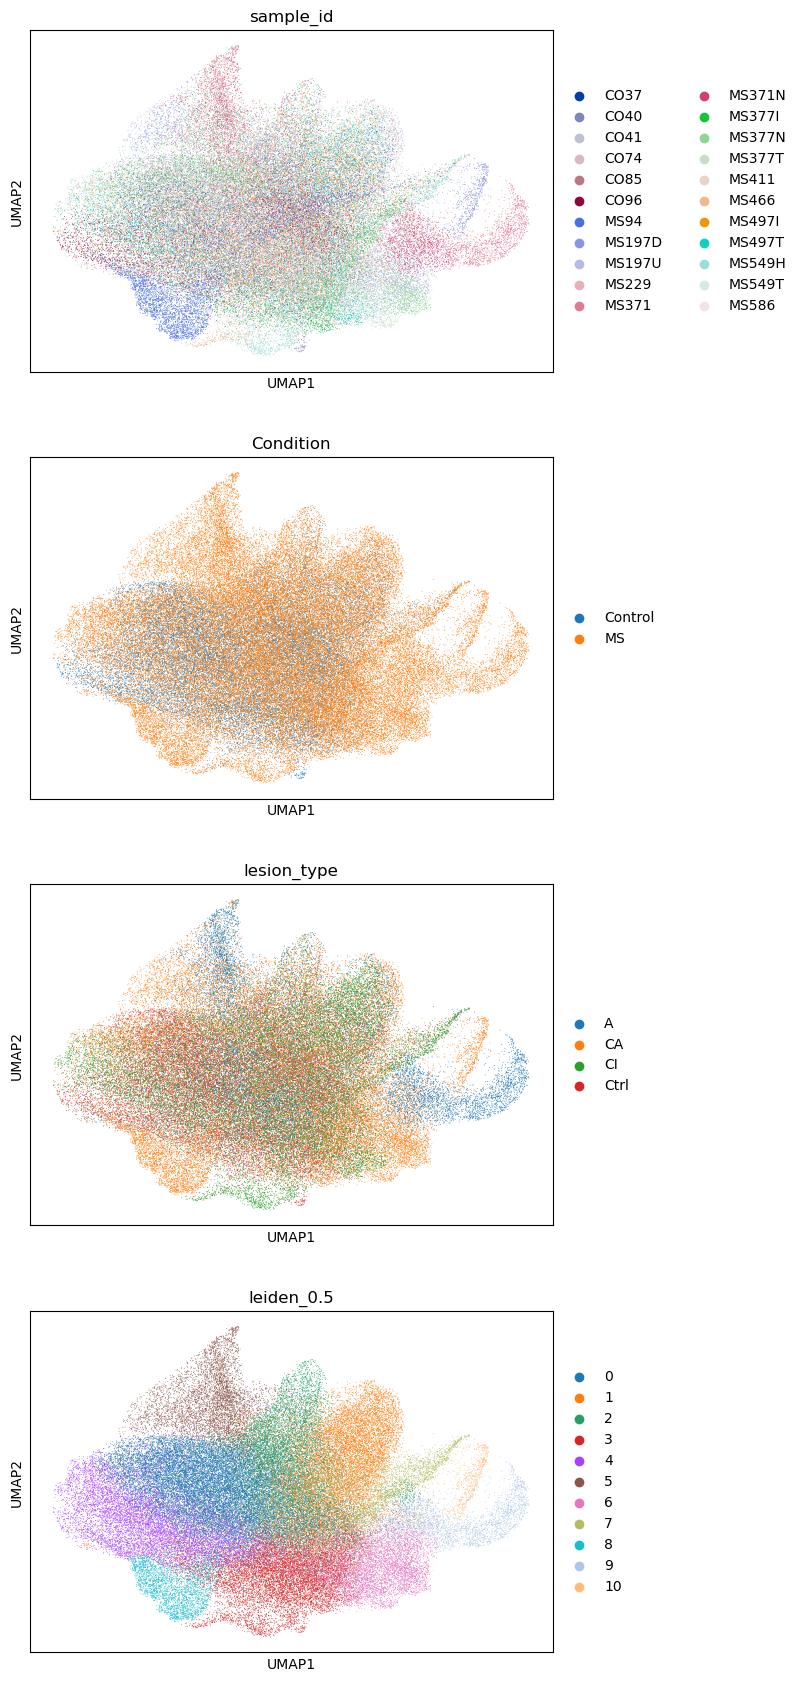

In [51]:
sc.pl.umap(adata, color=["sample_id", "Condition", "lesion_type", "leiden_0.5"], ncols=1)

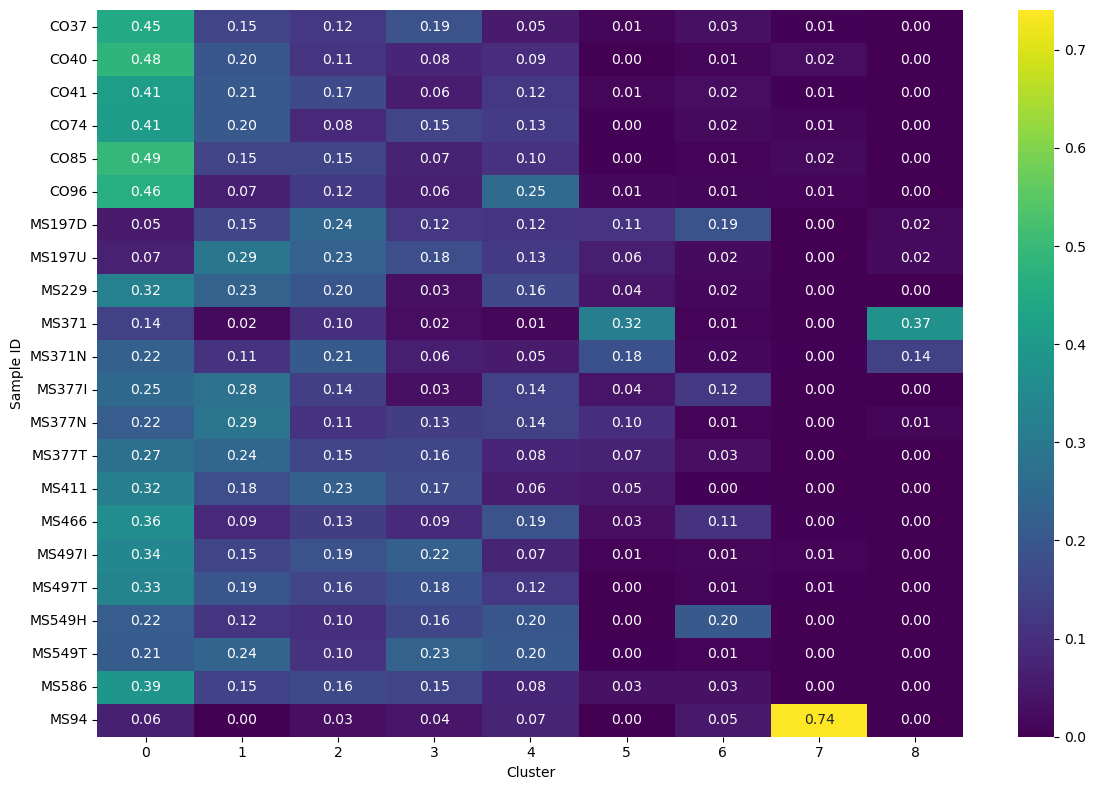

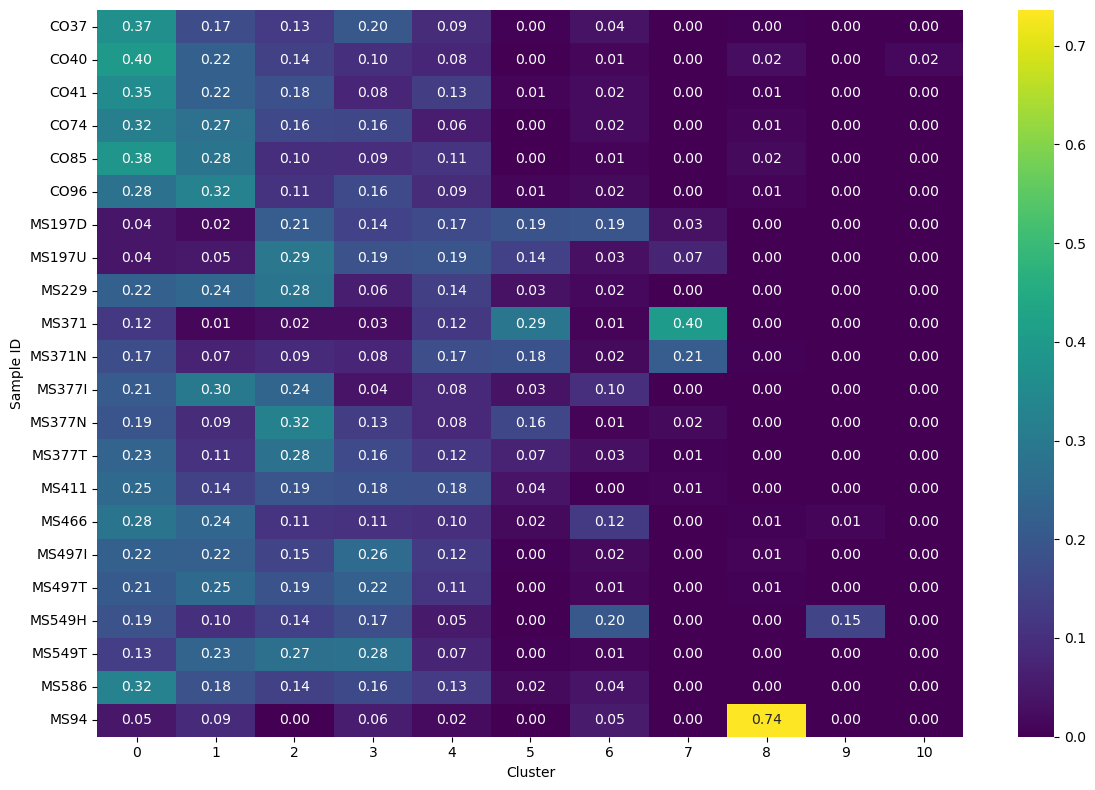

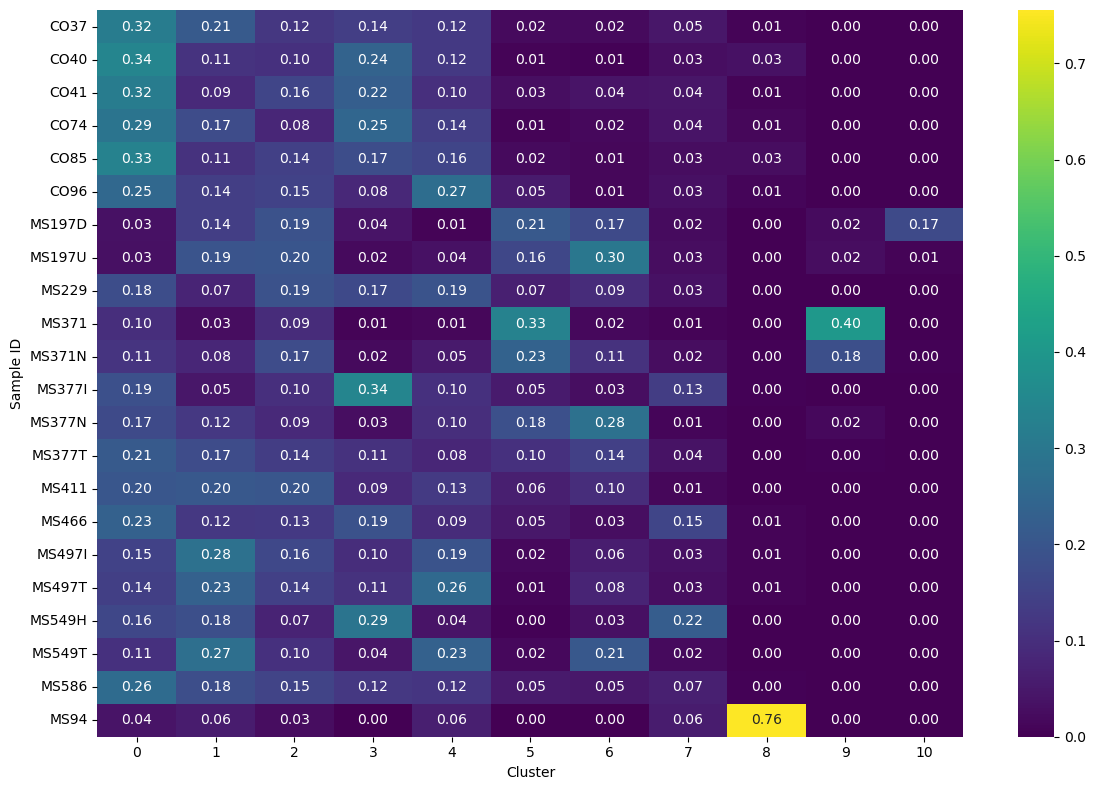

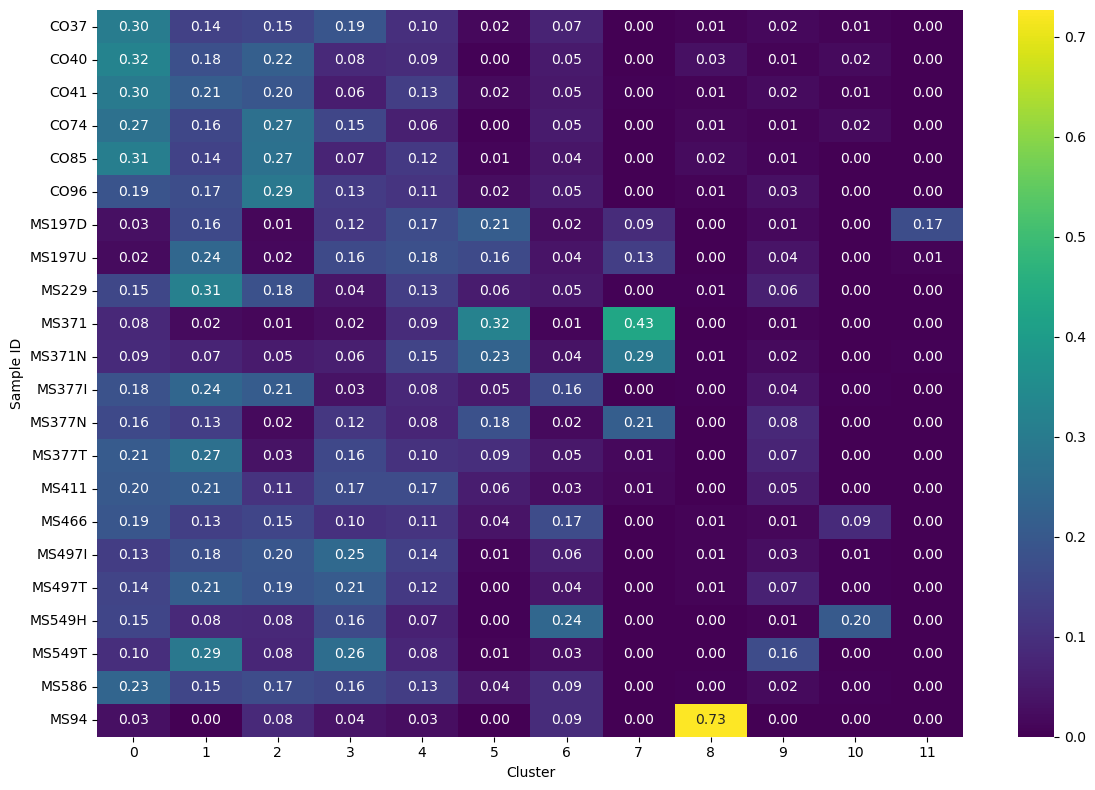

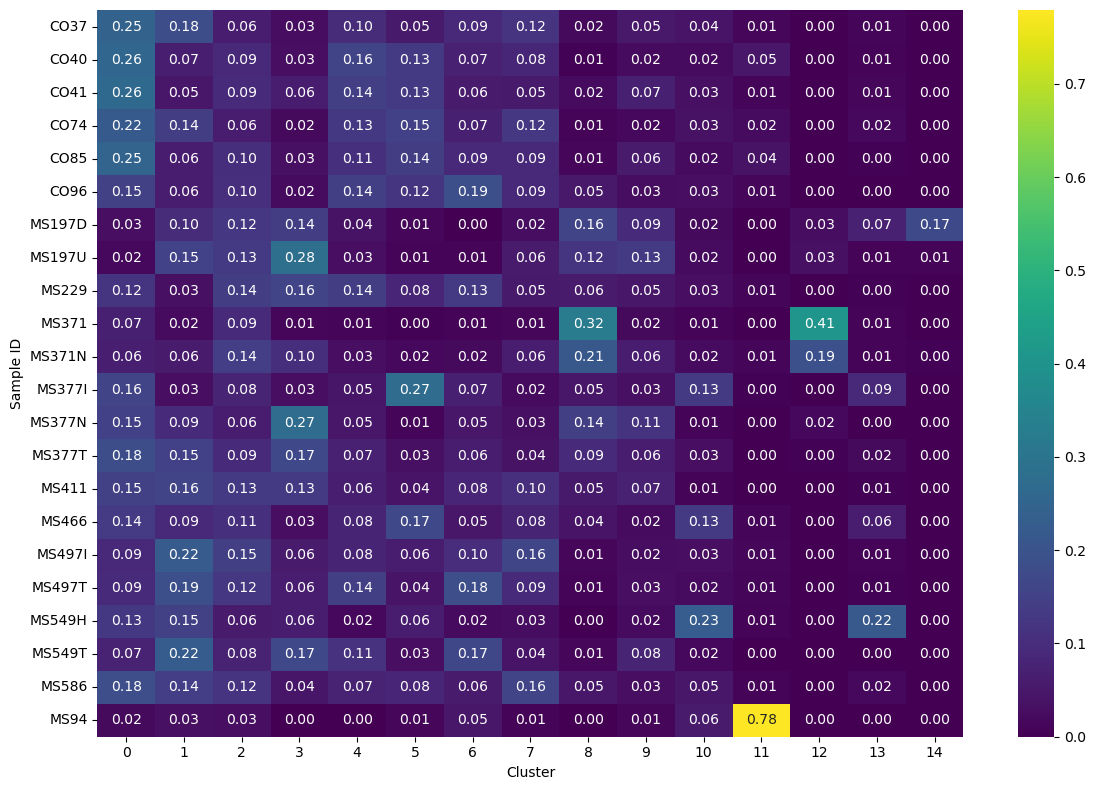

In [43]:
for res in resolutions:
    df = adata.obs.groupby(["sample_id", f"leiden_{res}"]).size().unstack()
    df = df.div(df.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(df, cmap="viridis", annot=True, fmt=".2f", ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Sample ID")
    fig.tight_layout()
    fig.suptitle(f"Cluster fractions per sample (resolution {res})")
    plt.show()
    #fig.savefig(plot_dir / f"cluster_fractions_per_sample_heatmap_res_{res}.pdf")

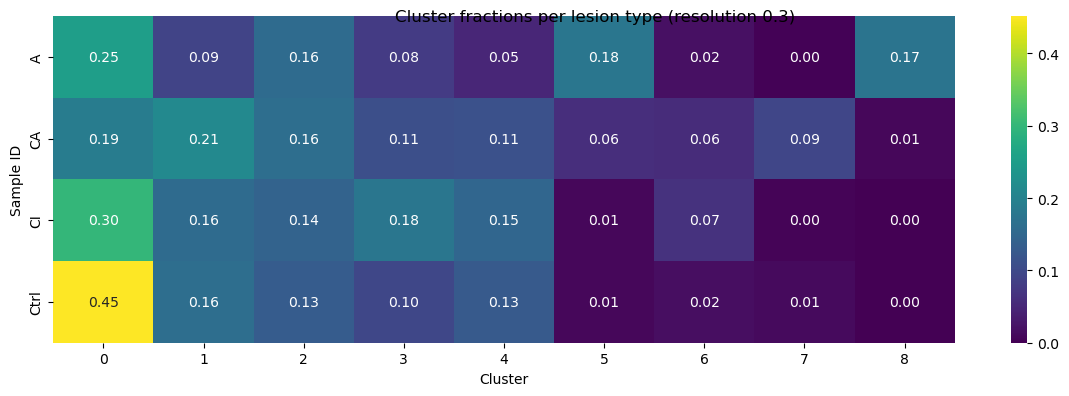

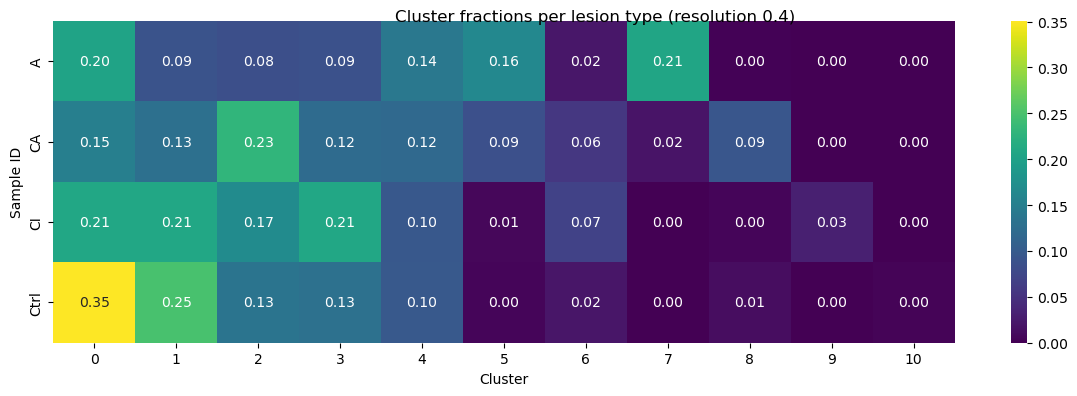

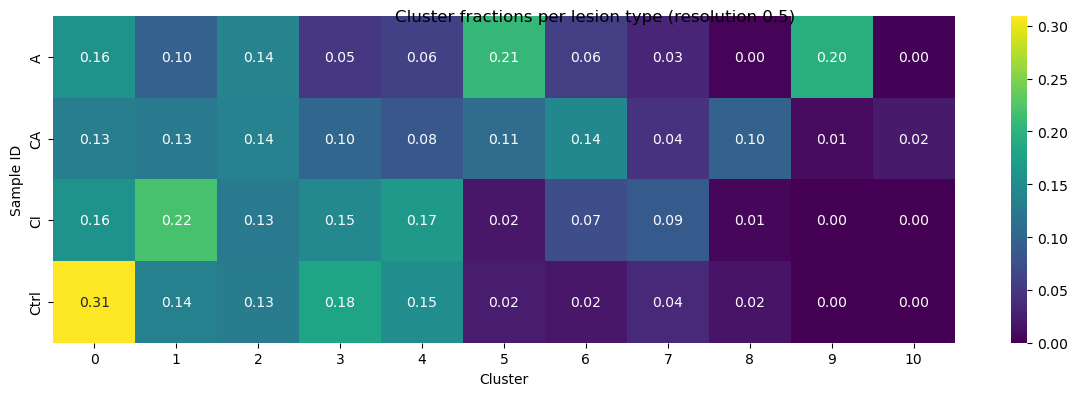

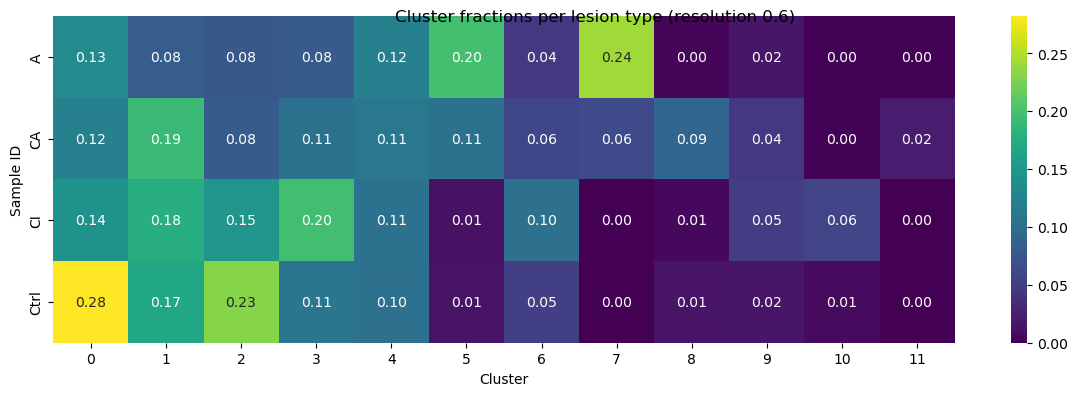

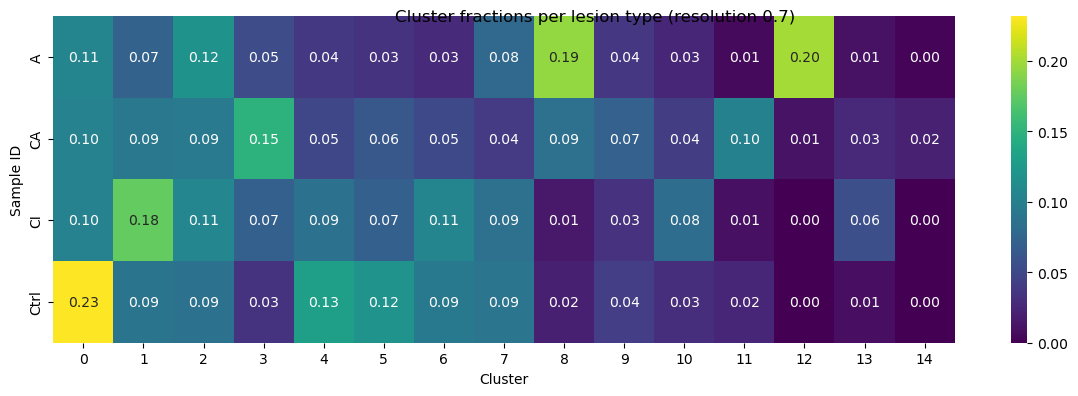

In [57]:
for res in resolutions:
    df = adata.obs.groupby(["lesion_type", f"leiden_{res}"]).size().unstack()
    df = df.div(df.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.heatmap(df, cmap="viridis", annot=True, fmt=".2f", ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Lesion Type")
    fig.tight_layout()
    fig.suptitle(f"Cluster fractions per lesion type (resolution {res})")
    plt.show()
    #fig.savefig(plot_dir / f"cluster_fractions_per_sample_heatmap_res_{res}.pdf")

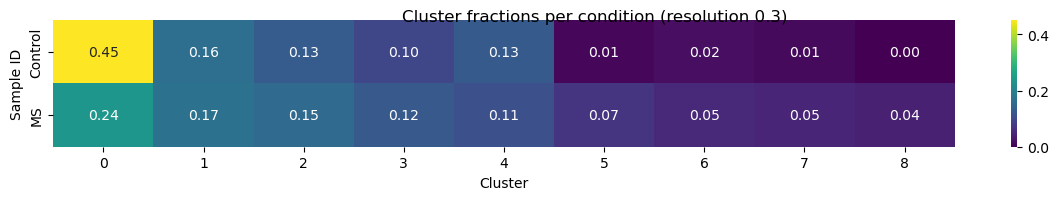

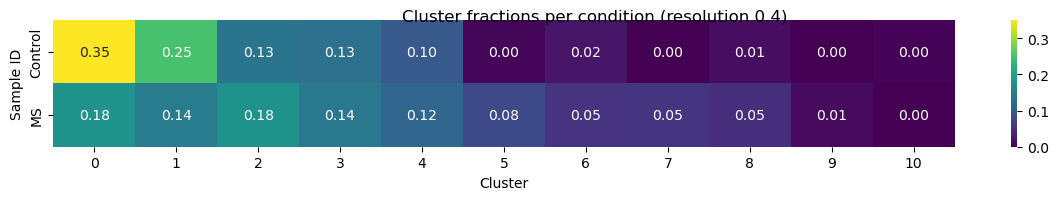

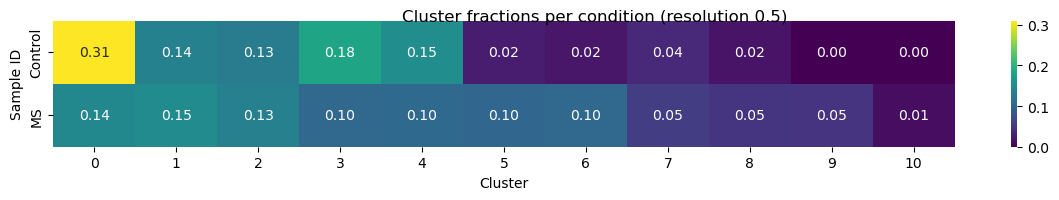

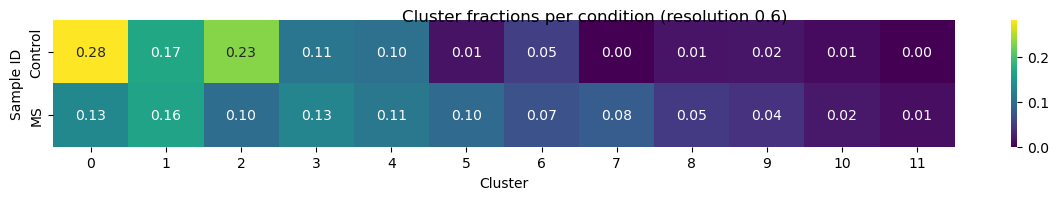

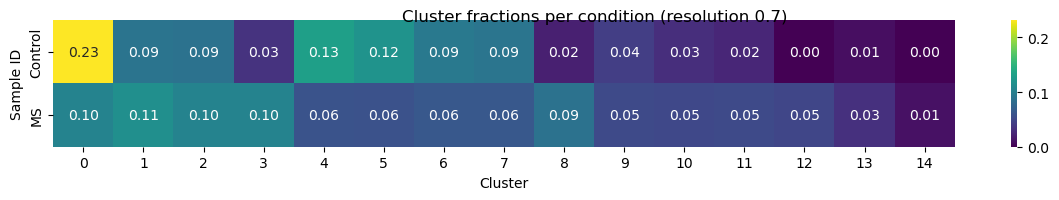

In [55]:
for res in resolutions:
    df = adata.obs.groupby(["Condition", f"leiden_{res}"]).size().unstack()
    df = df.div(df.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(12, 2))
    sns.heatmap(df, cmap="viridis", annot=True, fmt=".2f", ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Sample ID")
    fig.tight_layout()
    fig.suptitle(f"Cluster fractions per condition (resolution {res})")
    plt.show()
    #fig.savefig(plot_dir / f"cluster_fractions_per_sample_heatmap_res_{res}.pdf")

In [58]:
adata.obs

sample_id leiden_0.3 leiden_0.4 leiden_0.5 leiden_0.6  \
cell                                                                            
CO37_AAACAAGTATCTCCCA-1      CO37          3          3          1          3   
CO37_AAACACCAATAACTGC-1      CO37          0          0          0          9   
CO37_AAACAGAGCGACTCCT-1      CO37          0          0          0          0   
CO37_AAACAGCTTTCAGAAG-1      CO37          0          0          0          0   
CO37_AAACAGGGTCTATATT-1      CO37          3          1          1          2   
...                           ...        ...        ...        ...        ...   
MS94_TTGTTGTGTGTCAAGA-1      MS94          7          8          8          8   
MS94_TTGTTTCACATCCAGG-1      MS94          7          8          8          8   
MS94_TTGTTTCATTAGTCTA-1      MS94          7          8          8          8   
MS94_TTGTTTCCATACAACT-1      MS94          7          8          8          8   
MS94_TTGTTTGTGTAAATTC-1      MS94          4          1          8          2   

                        leiden_0.7 patient_id Condition lesion_type  Age Sex  \
cell                                                                           
CO37_AAACAAGTATCTCCCA-1          1  CO37 P5B3   Control        Ctrl   87   M   
CO37_AAACACCAATAACTGC-1          9  CO37 P5B3   Control        Ctrl   87   M   
CO37_AAACAGAGCGACTCCT-1          0  CO37 P5B3   Control        Ctrl   87   M   
CO37_AAACAGCTTTCAGAAG-1          0  CO37 P5B3   Control        Ctrl   87   M   
CO37_AAACAGGGTCTATATT-1          5  CO37 P5B3   Control        Ctrl   87   M   
...                            ...        ...       ...         ...  ...  ..   
MS94_TTGTTGTGTGTCAAGA-1         11  MS94 A1D9        MS          CA   42   F   
MS94_TTGTTTCACATCCAGG-1         11  MS94 A1D9        MS          CA   42   F   
MS94_TTGTTTCATTAGTCTA-1         11  MS94 A1D9        MS          CA   42   F   
MS94_TTGTTTCCATACAACT-1         11  MS94 A1D9        MS          CA   42   F   
MS94_TTGTTTGTGTAAATTC-1         11  MS94 A1D9        MS          CA   42   F   

                         RIN  Batch  visium  snRNA-seq  
cell                                                    
CO37_AAACAAGTATCTCCCA-1  6.1      3    True       True  
CO37_AAACACCAATAACTGC-1  6.1      3    True       True  
CO37_AAACAGAGCGACTCCT-1  6.1      3    True       True  
CO37_AAACAGCTTTCAGAAG-1  6.1      3    True       True  
CO37_AAACAGGGTCTATATT-1  6.1      3    True       True  
...                      ...    ...     ...        ...  
MS94_TTGTTGTGTGTCAAGA-1  8.7      1    True      False  
MS94_TTGTTTCACATCCAGG-1  8.7      1    True      False  
MS94_TTGTTTCATTAGTCTA-1  8.7      1    True      False  
MS94_TTGTTTCCATACAACT-1  8.7      1    True      False  
MS94_TTGTTTGTGTAAATTC-1  8.7      1    True      False  

[84258 rows x 15 columns]

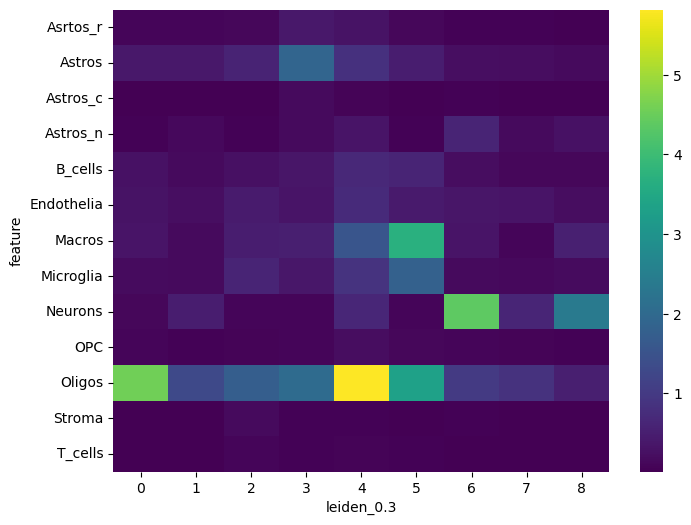

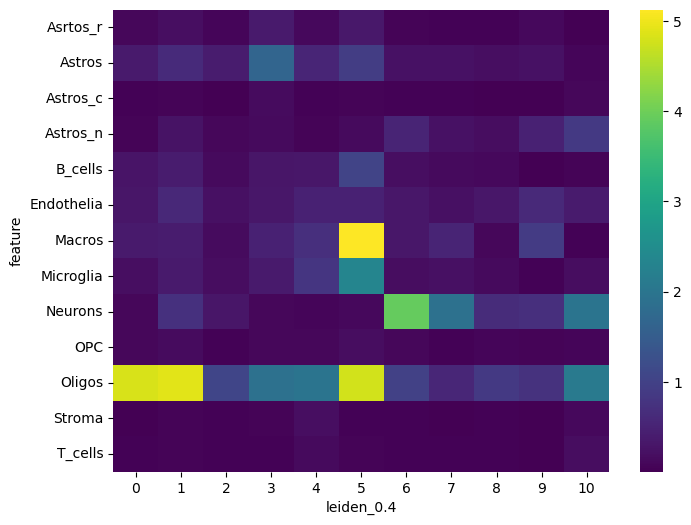

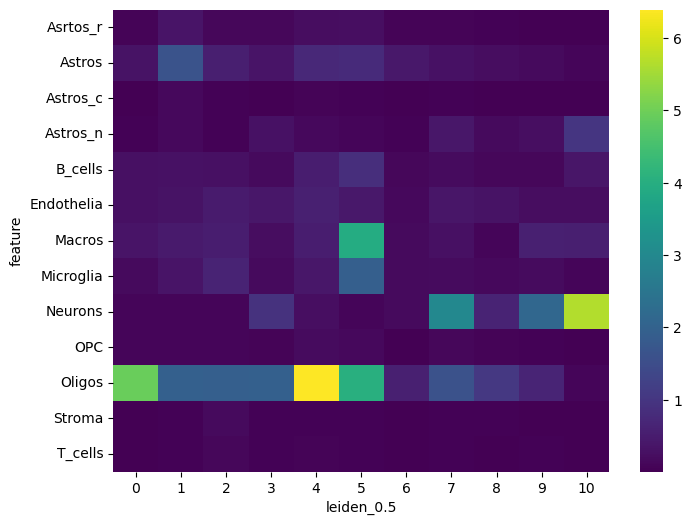

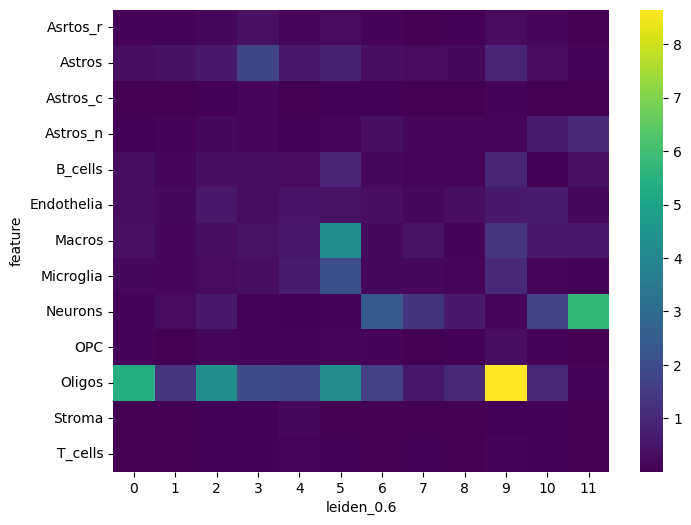

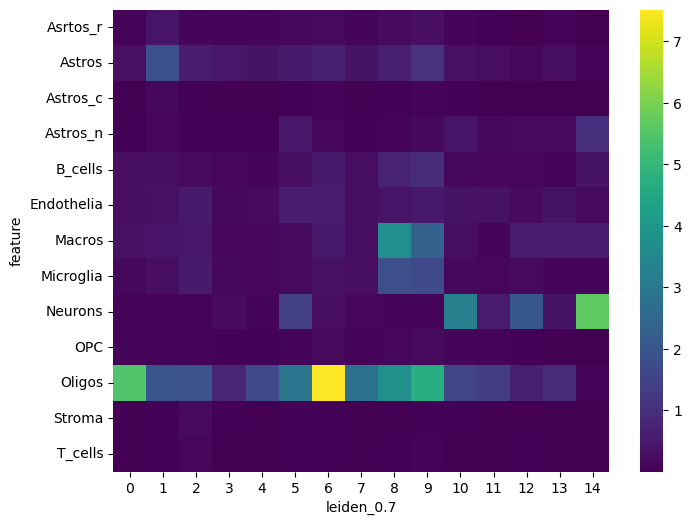

In [82]:
obsm_key = obsm_to_use[0]
df = adata.obsm[obsm_key].copy()
meta_keys = ["sample_id", "Condition", "lesion_type"] + ["leiden_" + str(res) for res in resolutions]
df = df.join(adata.obs[meta_keys], on="cell")
df.reset_index(inplace=True)
df = df.melt(id_vars=["cell"]+meta_keys, var_name="feature", value_name="value")
for res in resolutions:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(data=df.groupby(["feature", f"leiden_{res}"]).mean().reset_index().
                pivot(index="feature", columns=f"leiden_{res}", values="value"), 
                cmap="viridis")
    plt.show()

In [93]:
# min max scale each feature
df_tmp["min_max_value"] = df_tmp.groupby(["feature"]).value.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_tmp

feature leiden_0.7     value
0             ADIPOGENESIS          0  0.573112
1             ADIPOGENESIS          1  0.839192
2             ADIPOGENESIS          2  0.546640
3             ADIPOGENESIS          3  0.242793
4             ADIPOGENESIS          4  0.239633
..                     ...        ...       ...
745  XENOBIOTIC_METABOLISM         10  0.345408
746  XENOBIOTIC_METABOLISM         11  0.000000
747  XENOBIOTIC_METABOLISM         12  0.169506
748  XENOBIOTIC_METABOLISM         13  0.149570
749  XENOBIOTIC_METABOLISM         14  0.339182

[750 rows x 3 columns]

In [91]:
df_tmp

feature leiden_0.7     value
0             ADIPOGENESIS          0  1.688215
1             ADIPOGENESIS          1  2.364654
2             ADIPOGENESIS          2  1.620916
3             ADIPOGENESIS          3  0.848461
4             ADIPOGENESIS          4  0.840429
..                     ...        ...       ...
745  XENOBIOTIC_METABOLISM         10  0.781874
746  XENOBIOTIC_METABOLISM         11  0.200195
747  XENOBIOTIC_METABOLISM         12  0.485648
748  XENOBIOTIC_METABOLISM         13  0.452077
749  XENOBIOTIC_METABOLISM         14  0.771390

[750 rows x 3 columns]

In [89]:
df_tmp

feature leiden_0.7     value
0             ADIPOGENESIS          0  1.688215
1             ADIPOGENESIS          1  2.364654
2             ADIPOGENESIS          2  1.620916
3             ADIPOGENESIS          3  0.848461
4             ADIPOGENESIS          4  0.840429
..                     ...        ...       ...
745  XENOBIOTIC_METABOLISM         10  0.781874
746  XENOBIOTIC_METABOLISM         11  0.200195
747  XENOBIOTIC_METABOLISM         12  0.485648
748  XENOBIOTIC_METABOLISM         13  0.452077
749  XENOBIOTIC_METABOLISM         14  0.771390

[750 rows x 3 columns]

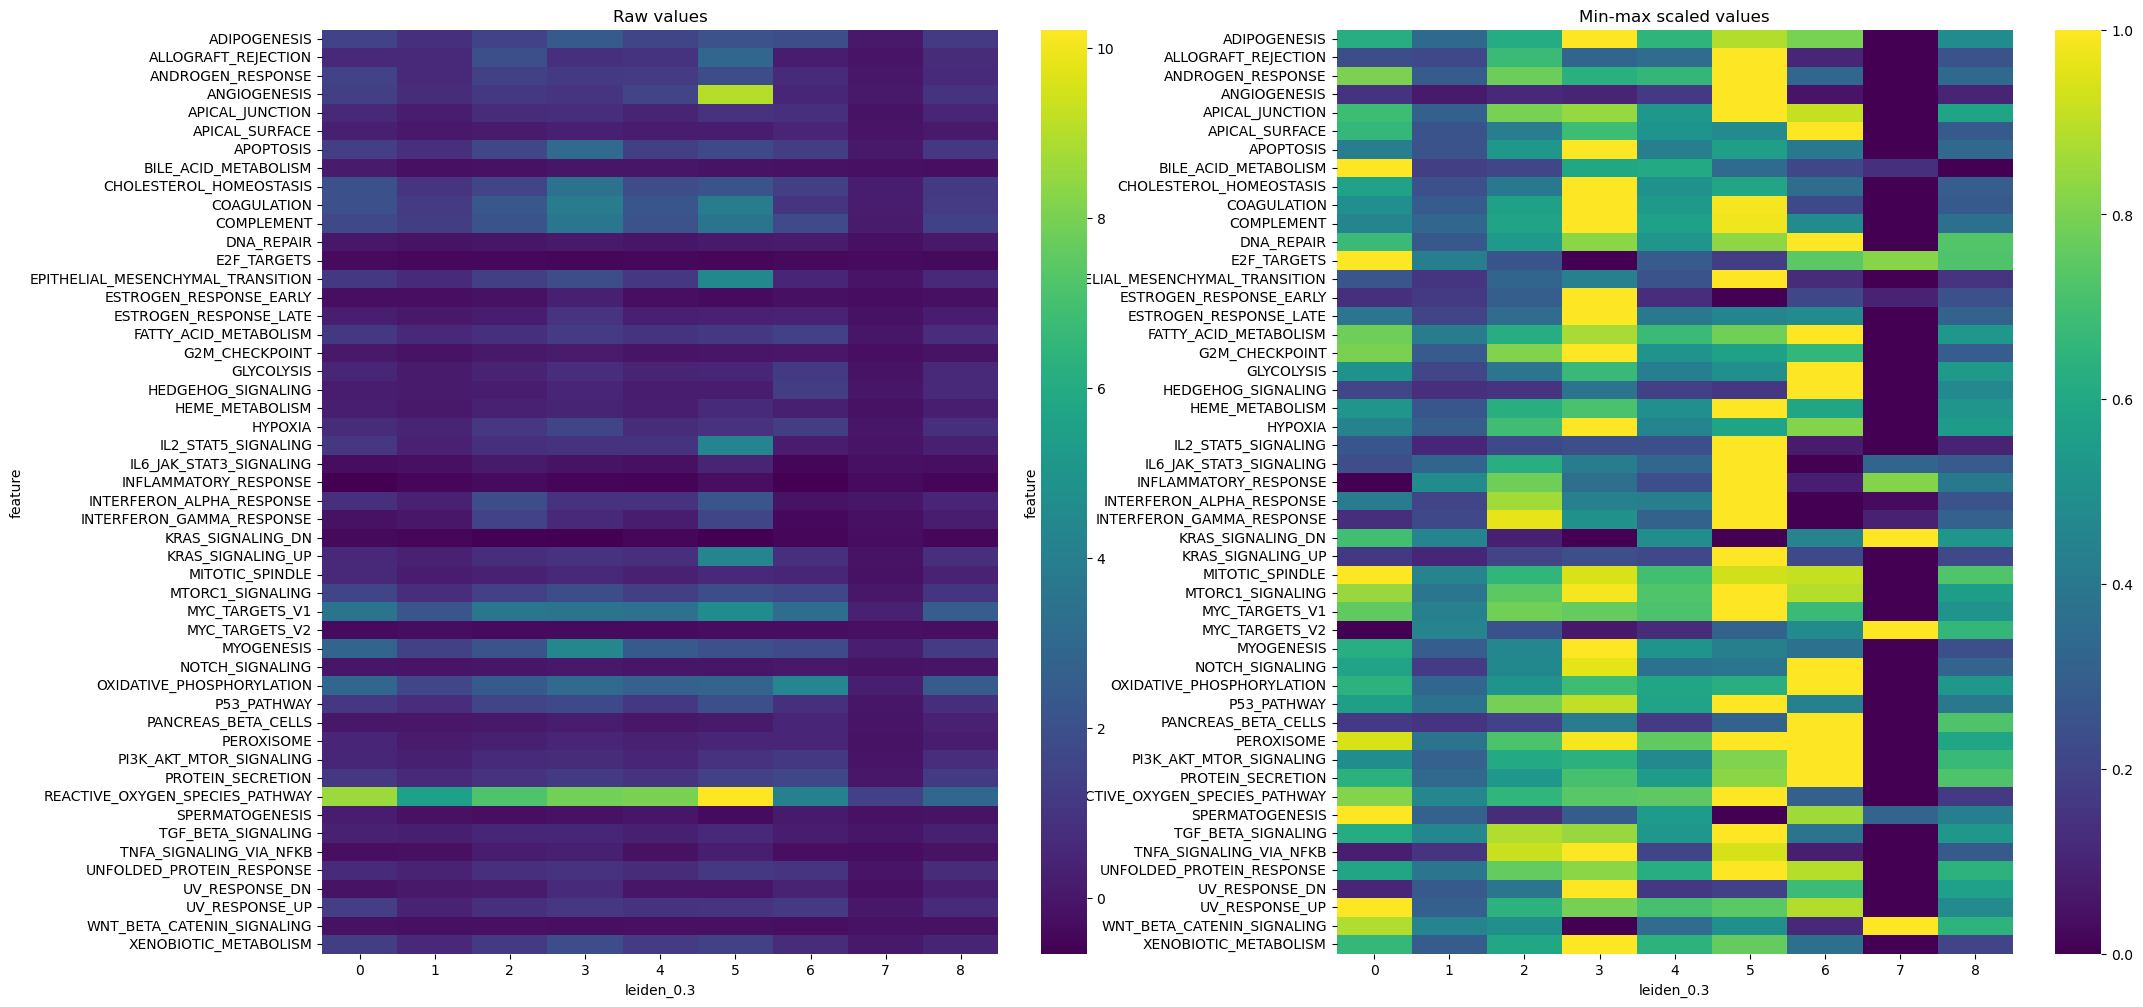

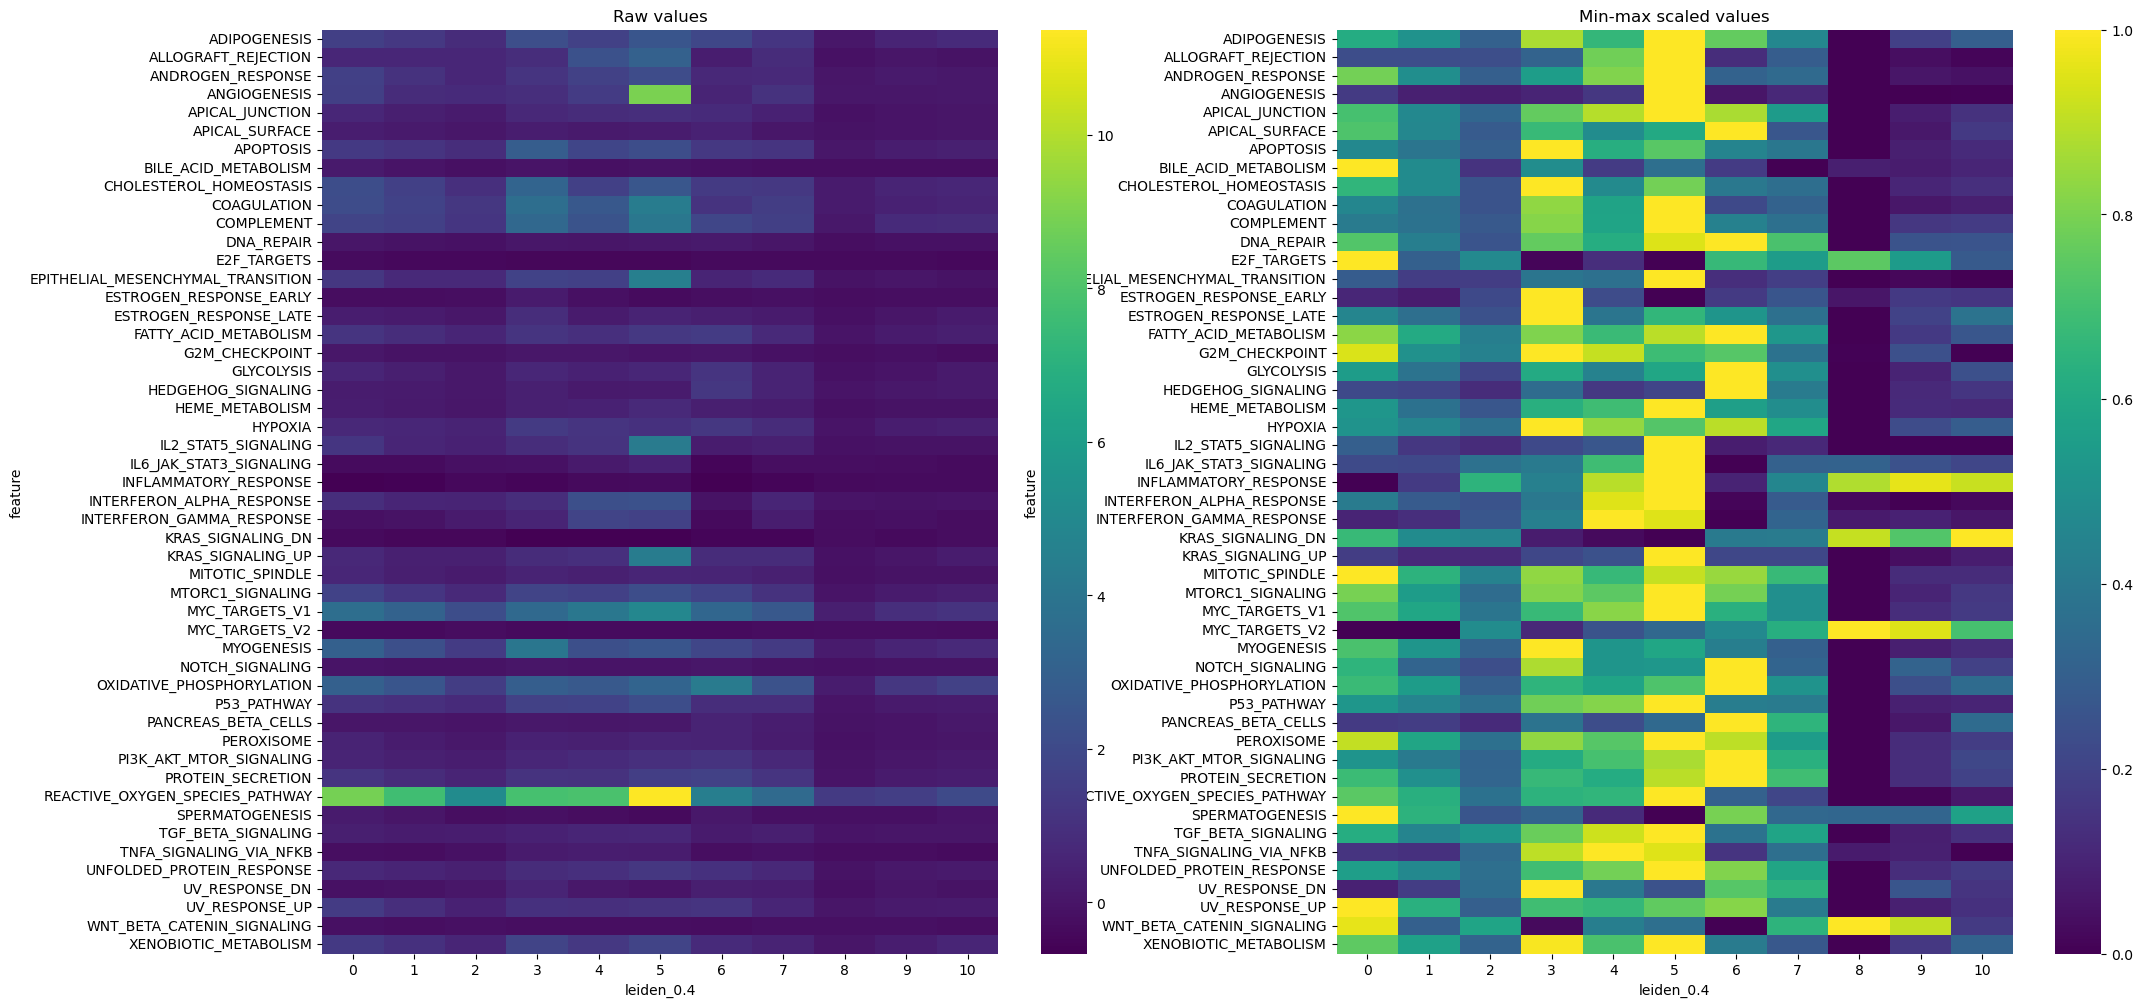

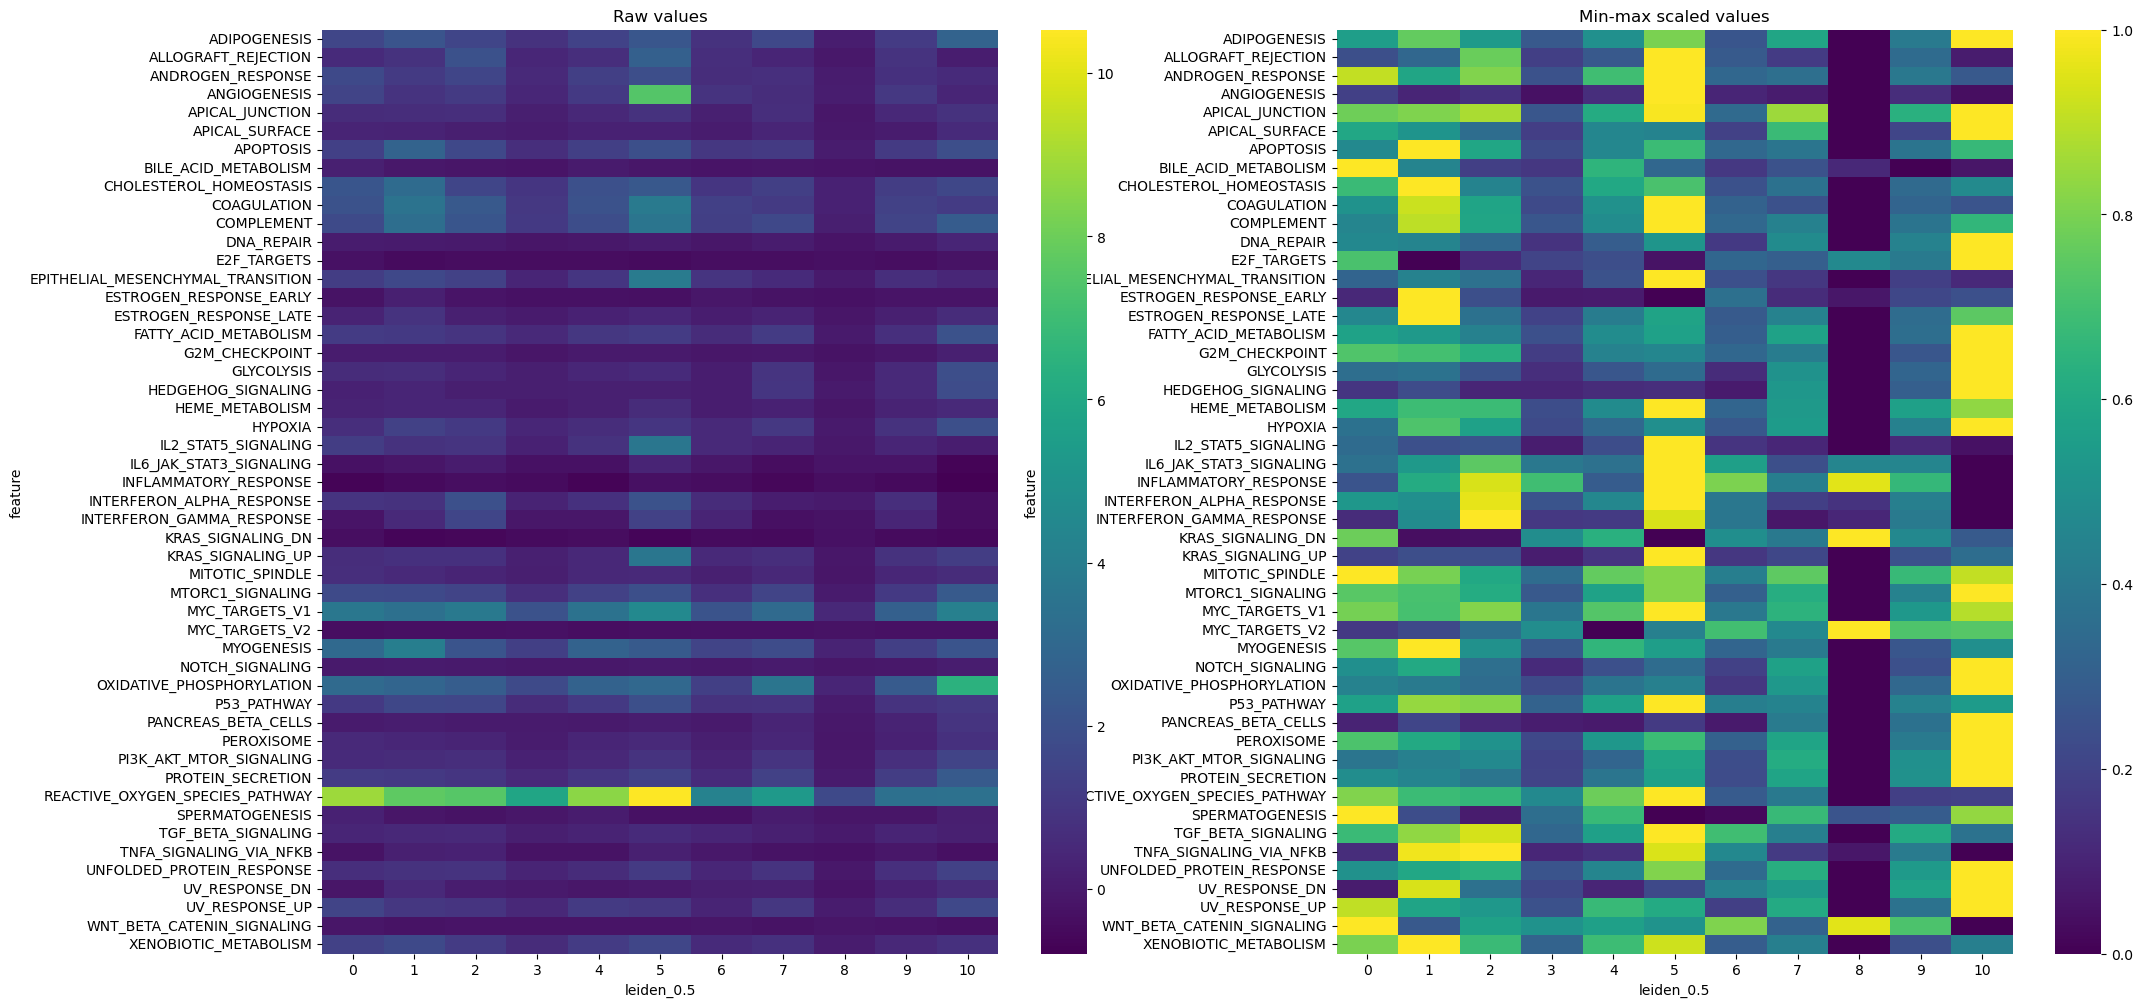

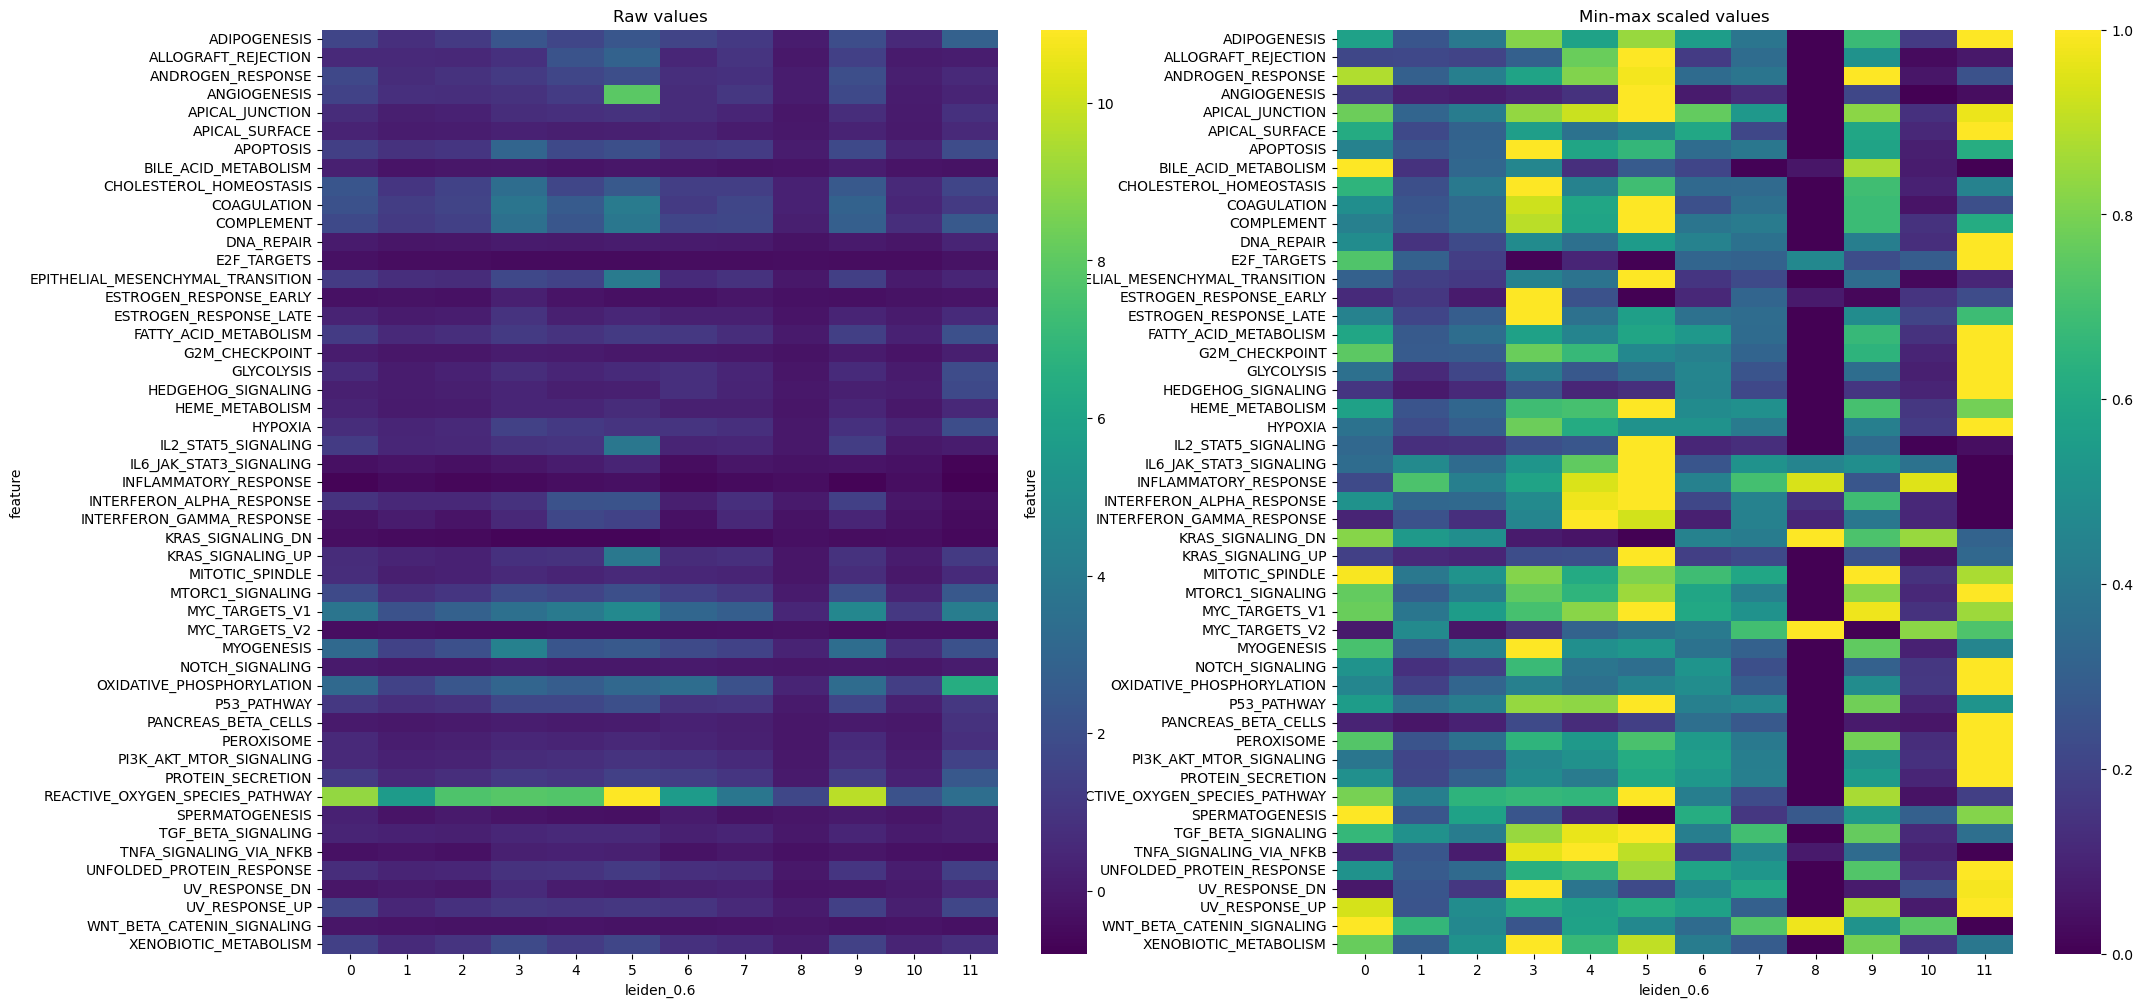

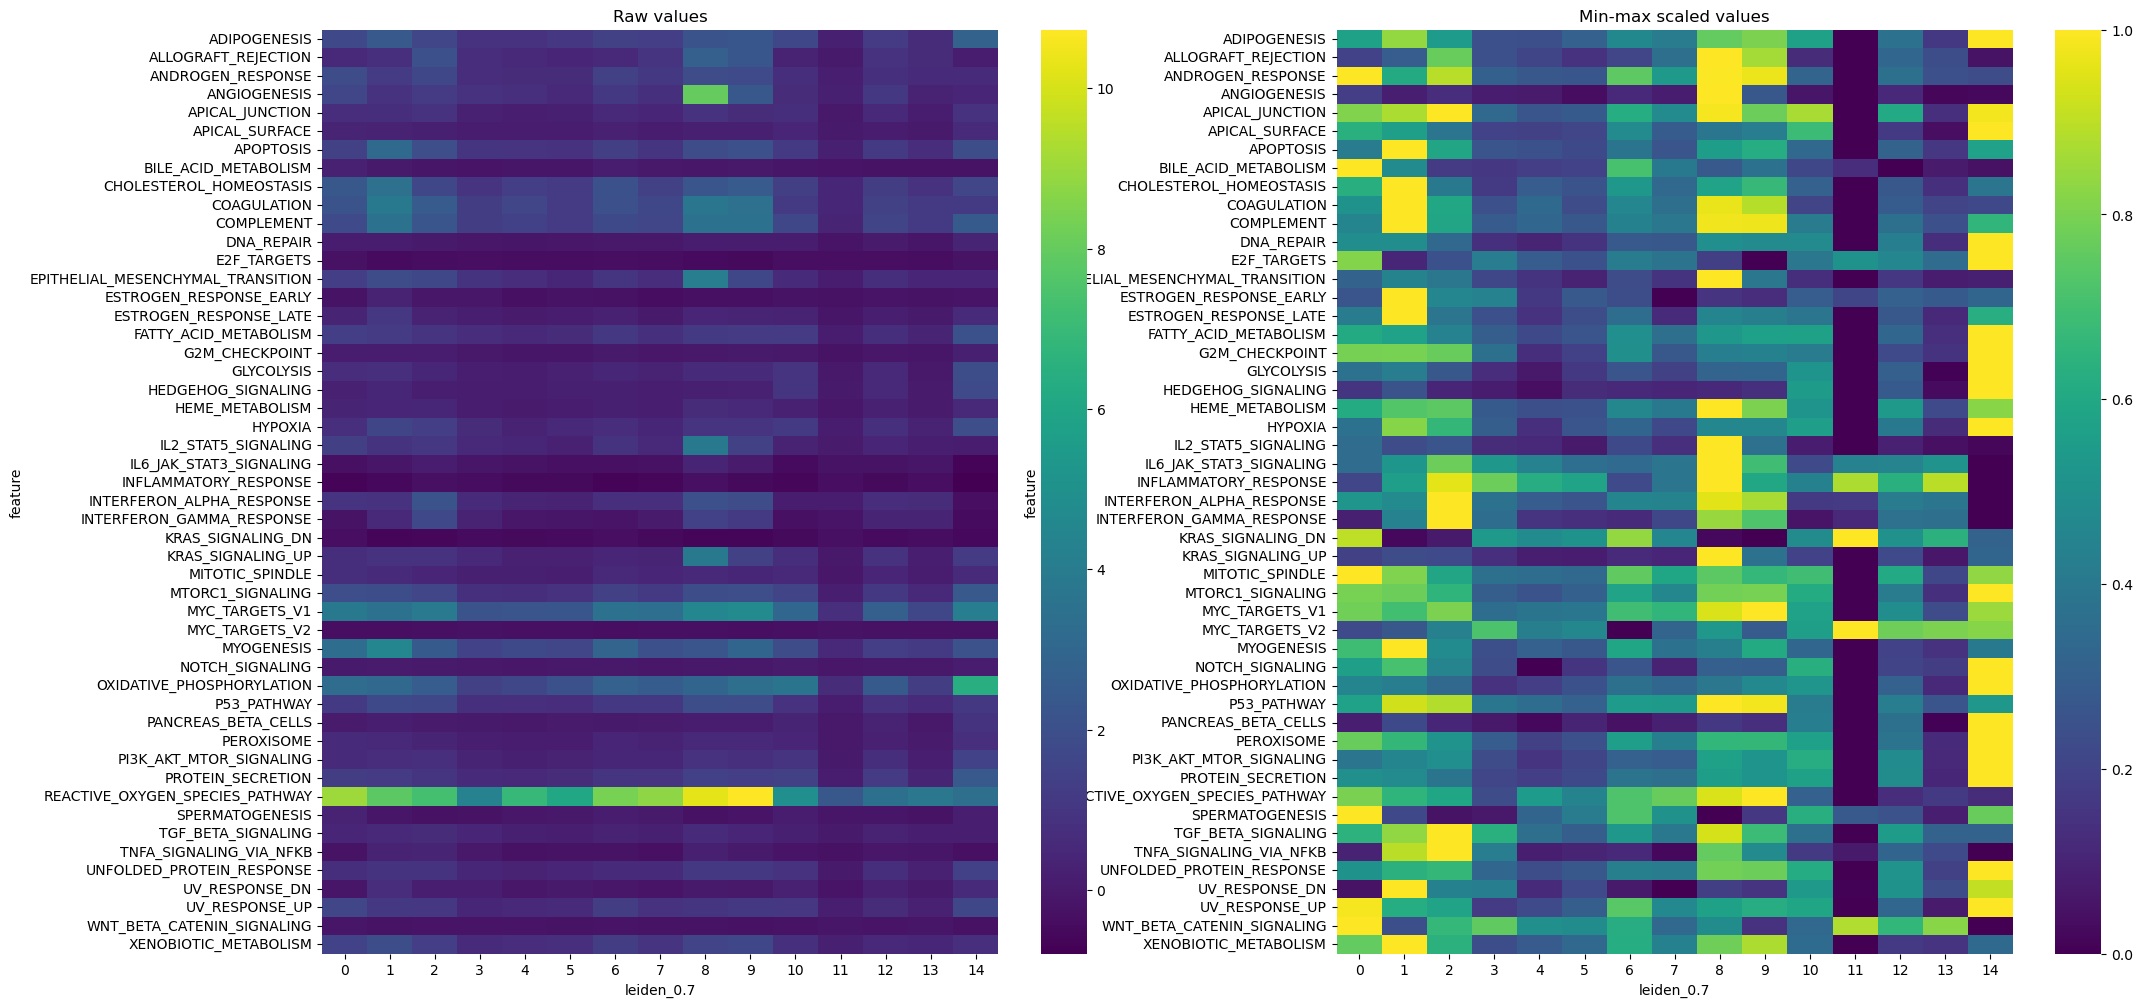

In [97]:
obsm_key = obsm_to_use[1]
df = adata.obsm[obsm_key].copy()
meta_keys = ["sample_id", "Condition", "lesion_type"] + ["leiden_" + str(res) for res in resolutions]
df = df.join(adata.obs[meta_keys], on="cell")
df.reset_index(inplace=True)
df = df.melt(id_vars=["cell"]+meta_keys, var_name="feature", value_name="value")
for res in resolutions:
    df_tmp = df.groupby(["feature", f"leiden_{res}"]).mean().reset_index()
    df_tmp["min_max_value"] = df_tmp.groupby(["feature"]).value.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    fig, ax = plt.subplots(1, 2, figsize=(24, 12))
    sns.heatmap(data=df_tmp.pivot(index="feature", columns=f"leiden_{res}", values="value"), 
                cmap="viridis", ax=ax[0])
    sns.heatmap(data=df_tmp.pivot(index="feature", columns=f"leiden_{res}", values="min_max_value"), 
            cmap="viridis", ax=ax[1])
    ax[0].set_title("Raw values")
    ax[1].set_title("Min-max scaled values per feature")
    plt.show()

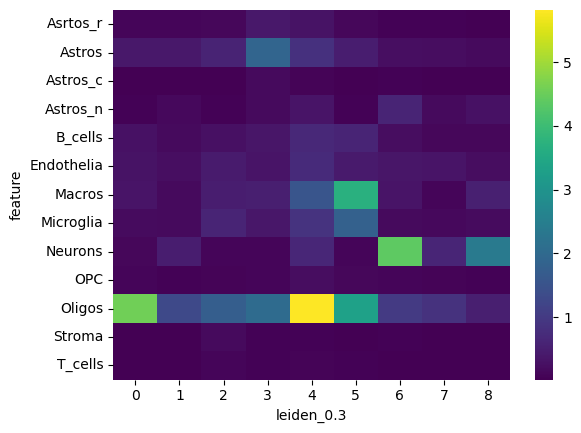

In [78]:
# make heatmap with leiden_0.3 on x axis feature on y axis and fill by mean value
# make heatmap with leiden_0.3 on x axis feature on y axis and fill by mean value
sns.heatmap(data=df.groupby(["feature", "leiden_0.3"]).mean().reset_index().pivot(index="feature", columns="leiden_0.3", values="value"), cmap="viridis")
plt.show()

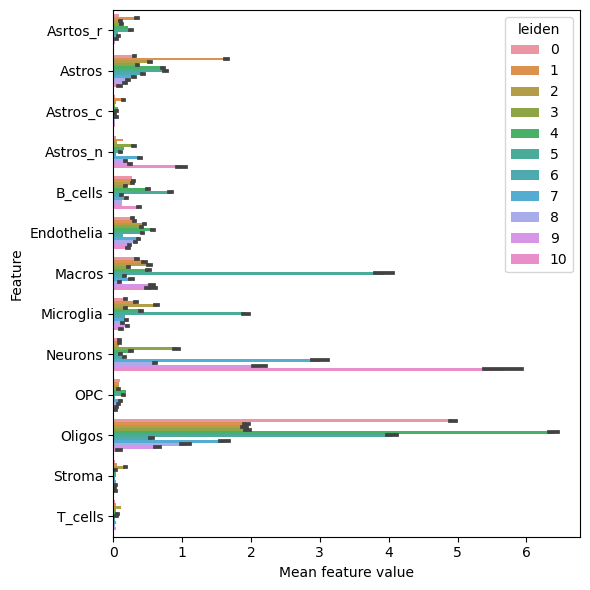

In [29]:
obsm_key = obsm_to_use[0]
df = adata.obsm[obsm_key].copy()
df["leiden"] = adata.obs.leiden.values
df["condition"] = adata.obs.condition.values
df.reset_index(inplace=True)
df = df.melt(id_vars=["cell", "leiden", "condition"], var_name="feature", value_name="value")

# compute mean feature per leiden and plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=df, x="value", y="feature", hue="leiden", ax=ax)
ax.set_ylabel("Feature")
ax.set_xlabel("Mean feature value")
fig.tight_layout()

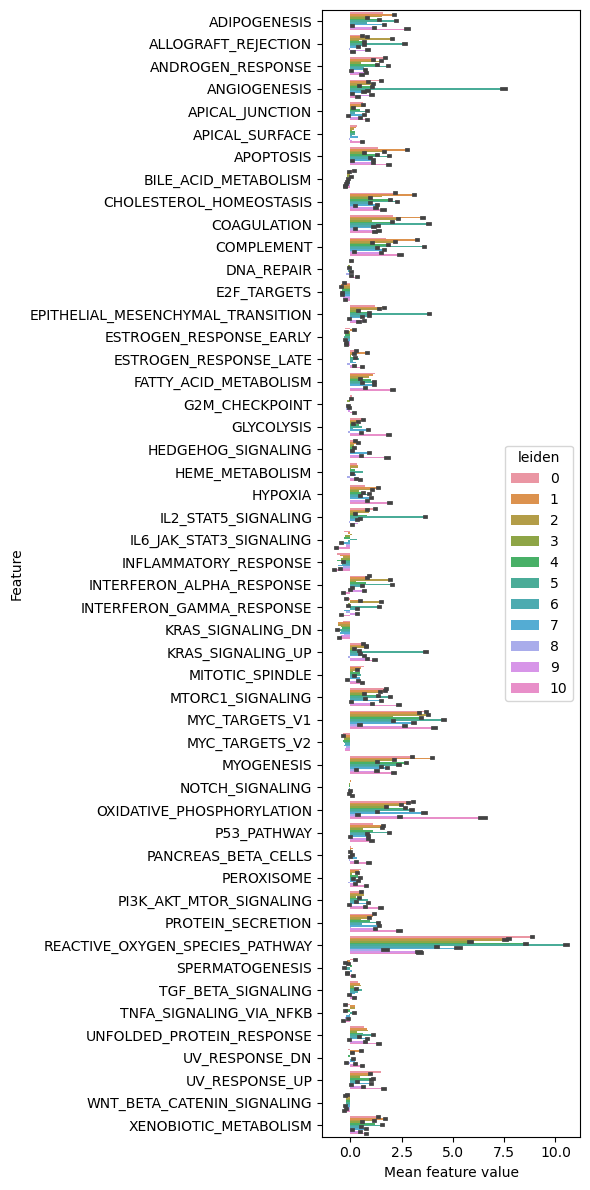

In [30]:
obsm_key = obsm_to_use[1]
df = adata.obsm[obsm_key].copy()
df["leiden"] = adata.obs.leiden.values
df["condition"] = adata.obs.condition.values
df.reset_index(inplace=True)
df = df.melt(id_vars=["cell", "leiden", "condition"], var_name="feature", value_name="value")

# compute mean feature per leiden and plot
fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(data=df, x="value", y="feature", hue="leiden", ax=ax)
ax.set_ylabel("Feature")
ax.set_xlabel("Mean feature value")
fig.tight_layout()

# Feature Loadings per Factor

In [ ]:
model.get_factors().shape

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(model.get_weights(df=True).loc[obsm_features["abunds_all"], :], ax=ax, cmap="coolwarm", center=0)
plt.show()

# same heatmap as above but standardize each column (subtract mean and divide by std)
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#df = model.get_weights(df=True).loc[obsm_features["abunds_all"], :]
#df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
#sns.heatmap(df, ax=ax, cmap="coolwarm", center=0)
#plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 10))
sns.heatmap(model.get_weights(df=True).loc[obsm_features["hallmark_estimates"], :], ax=ax, cmap="coolwarm", center=0)
plt.show()

# same heatmap as above but standardize each column (subtract mean and divide by std)
#xfig, ax = plt.subplots(1, 1, figsize=(6, 10))
#xdf = model.get_weights(df=True).loc[obsm_features["hallmark_estimates"], :]
#xdf = df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
#xsns.heatmap(df, ax=ax, cmap="coolwarm", center=0)
#xplt.show()

# Distribution of Factors per Sample or Condition

In [ ]:
df = model.get_factors(df=True)
df["sample_id"] = meta_df.loc[model.get_cells().cell, "sample_id"].values
df["condition"] = meta_df.loc[model.get_cells().cell, "condition"].values
df["lesion_type"] = meta_df.loc[model.get_cells().cell, "lesion_type"].values
df = df.reset_index().melt(id_vars=["index", "sample_id", "condition", "lesion_type"], var_name="Factor", value_name="value")

In [ ]:
g = sns.FacetGrid(data=df, col="Factor", hue="condition", col_wrap=3, sharex=False, sharey=False, legend_out=True)
g.map_dataframe(sns.histplot, x="value", stat="density", common_norm=False, bins=100, alpha=0.5)
g.tight_layout()
g.add_legend()
plt.show()

In [ ]:
#g = sns.FacetGrid(data=df, row="condition", col="Factor", legend_out=True)
#g.map_dataframe(sns.histplot, x="value", stat="density", common_norm=False, bins=100)
#g.tight_layout()
#g.add_legend()
#plt.show()
#
#g = sns.FacetGrid(data=df, row="sample_id", col="Factor", legend_out=True)
#g.map_dataframe(sns.histplot, x="value", stat="density", common_norm=False, bins=100)
#g.tight_layout()
#g.add_legend()
#plt.show()

# Correlation of Factors

In [ ]:
# the factors are mutally independent?
mfx.plot_factors_correlation(model)

# R2 Values

In [ ]:
df_r2 = model.get_r2()

In [ ]:
mfx.plot.plot_r2(model, y="Group", x="Factor")
#mfx.plot_r2_barplot(model, factors=list(range(0, 6)), x="Group", groupby="Factor", palette="winter")

In [ ]:
df_r2

In [ ]:
# group df_r2 by Group and Factor and take the geometric mean of the R2 values
stat = df_r2.drop("View", axis=1).groupby(["Group", "Factor"]).apply(lambda x: np.prod(x)**(1/len(x))).groupby("Group").sum().R2.mean()
stat

# Random

In [ ]:
plt.figure(figsize=(4, 10))
ax = mfx.plot_weights(model, n_features=2, y_repel_coef=0.04, x_rank_offset=-150, views=["abunds_all"])
plt.show()

In [ ]:
plt.figure(figsize=(4, 10))
ax = mfx.plot_weights(model, n_features=2, y_repel_coef=0.04, x_rank_offset=-150, views=["hallmark_estimates"])
plt.show()

In [ ]:
mfx.plot_weights_heatmap(model, n_features=5, view=0,
                         factors=range(0, 9), 
                         xticklabels_size=6, w_abs=True, 
                         cmap="viridis", cluster_factors=False)

In [ ]:
mfx.plot_weights_heatmap(model, n_features=5, view=1,
                         factors=range(0, 9), 
                         xticklabels_size=6, w_abs=True, 
                         cmap="viridis", cluster_factors=False)

In [ ]:
mfx.plot_weights_dotplot(model, n_features=3, 
                         w_abs=True, 
                         factors=list(range(0, 9)), yticklabels_size=5)